# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Carregando os dados de Treino e Teste**

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [2]:
import tensorflow as tf

In [3]:
import keras as K

In [4]:
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.optimizers import Adam
from keras.layers import Dropout

In [5]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [6]:
# Definindo a arquitetura do modelo
classifier = Sequential()
# Usando Input como a primeira camada
classifier.add(Input(shape=(64, 64, 3)))  # Definindo a forma da entrada
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5))
classifier.add(Conv2D(64, (3, 3), activation='relu'))  # Camada convolucional adicional
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5))
classifier.add(Conv2D(128, (3, 3), activation='relu'))  # Camada convolucional adicional
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compilando o modelo
classifier.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['binary_accuracy'])

**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [8]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory(r'C:\Users\ryanr\Documents\Python\datasets\dogs-vs-cats\train',
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 shuffle=True,
                                                 seed=198,
                                                 class_mode = 'binary')

Found 25000 images belonging to 2 classes.


**Treinamento do Modelo**

In [9]:
# Executando o treinamento
classifier.fit(training_set,
               steps_per_epoch=70,
               epochs=30)

Epoch 1/30


c:\Users\ryanr\Documents\Python\venvs\dogs-or-cats\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 5/70 ━━━━━━━━━━━━━━━━━━━━ 2:23 2s/step - binary_accuracy: 0.4737 - loss: 0.7451

KeyboardInterrupt: 

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

In [9]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


Testar o modelo treinado com TODAS AS IMAGENS que ele ainda não viu. Por fim, verificamos o resultado da acurácia total.

In [11]:
import numpy as np

# Avaliação do Modelo
# Configurando o gerador de dados de teste (sem data augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    r'C:\Users\ryanr\Documents\Python\datasets\dogs-vs-cats\test1',
    target_size=(64, 64),
    batch_size=32,
    class_mode=None,  # Sem labels, logo, a métrica de test_loss não será calculada.
    shuffle=True  # Para manter a ordem das imagens
)

# Obtendo as predições do modelo
predictions = classifier.predict(test_set)

# Calculando a confiança das predições
confidence_scores = np.max(predictions, axis=1)  # Para um modelo binário, isso dá a confiança da predição

# Calculando a confiança média
mean_confidence = np.mean(confidence_scores)

# Imprimindo a confiança média
print(f'Confiança média do modelo: {mean_confidence * 100:.2f}%')


Found 12500 images belonging to 1 classes.
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step
Confiança média do modelo: 54.58%


Testa o modelo treinado para uma única imagem do dataset de treino:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Previsão: Cachorro
Confiança do modelo para a imagem: 53.89%


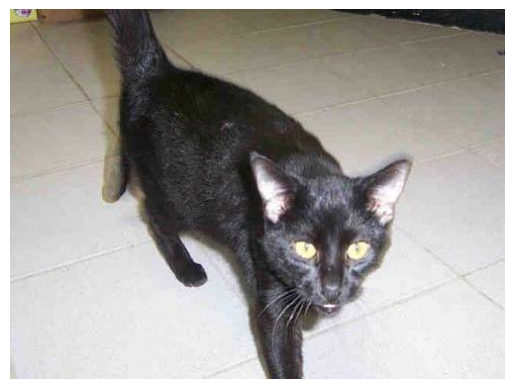

In [13]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Carregando e pré-processando uma única imagem
img_path = r'C:\Users\ryanr\Documents\Python\datasets\dogs-vs-cats\test1\test1\313.jpg'  # Coloque aqui o caminho da sua imagem
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Normalizando a imagem
img_array /= 255.0

# Fazendo a predição para a imagem
prediction = classifier.predict(img_array)

# Determinando se é um cachorro ou gato
if prediction[0][0] >= 0.5:
    classification = "Cachorro"
else:
    classification = "Gato"

# Predição:
print("Previsão:", classification)

# Calculando a confiança da predição
confidence = np.max(prediction)

# Imprimindo a confiança da predição
print(f'Confiança do modelo para a imagem: {confidence * 100:.2f}%')

# Exibindo a imagem
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()


**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

**Melhorias adicionais para este modelo:**

*   Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
*   aumentar o redimensionamento da imagem de 64x64 para 256x256.
*   Aumentar o tamanho do lote de 32 para 64.
*   Alterar a arquitetura da rede incluindo mais uma camada convolucional.
*   Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
*   Experimentar outros algoritmos de otimização.








Fim! 🔥